# **This is a code for SSIM test**

---



Project Name: Raava: Google Chrome Extensions Artificial Intelligence for Phishing Email Prevention and Image Forgery Detection

Student Name: Mokhamad Fikri Alfawaid

Student Id: 2500125A

Major: IT Cyber Security

Year: 2021

University of Glasgow

# **Code**

In [ ]:
# import library
from skimage.metrics import mean_squared_error as compare_mse
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from pathlib import Path
import pandas as pd
import cv2 as cv
import numpy as np

In [ ]:
# SSIM score checker function
def detectSSIMScore(path1, path2):
  # load images
  imageA = cv.imread(path1)
  imageB = cv.imread(path2)

  # grayscale
  grayA = cv.cvtColor(imageA, cv.COLOR_BGR2GRAY)
  grayB = cv.cvtColor(imageB, cv.COLOR_BGR2GRAY)

  #  compute the SSIM
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff *255).astype("uint8")

  return score

# **Check SSIM, MSE, and PSNR Difference**

In [ ]:
# collecting embedded payload images
imageOriginalArray = []
imageSteganoArray1 = []
imageSteganoArray2 = []
imageSteganoArray3 = []
imageSteganoArray4 = []

for img_path in sorted(Path('./drive/MyDrive/Image_Forgery_Detection/Dataset_50').glob('*.jpg')):
    input_image = str(img_path)
    imageOriginalArray.append(input_image)

for img_path in sorted(Path('./drive/MyDrive/Image_Forgery_Detection/Stego_20_Bytes').glob('*.png')):
    input_imaji = str(img_path)
    imageSteganoArray1.append(input_imaji)

for img_path in sorted(Path('./drive/MyDrive/Image_Forgery_Detection/Stego_21_Bytes').glob('*.png')):
    input_imajineshon = str(img_path)
    imageSteganoArray2.append(input_imajineshon) 

for img_path in sorted(Path('./drive/MyDrive/Image_Forgery_Detection/Stego_Min_Bytes').glob('*.png')):
    input_imagination = str(img_path)
    imageSteganoArray3.append(input_imagination)

for img_path in sorted(Path('./drive/MyDrive/Image_Forgery_Detection/Stego_Max_Bytes').glob('*.png')):
    maximum_imajineshon = str(img_path)
    imageSteganoArray4.append(maximum_imajineshon)

**Compare 20 and 21 bytes payload SSIM, MSE, and PSNR**

In [ ]:
result = []
number = 1
for i in range(0,50):
    score = []
    # score 20 Bytes
    score_ssim_20_bytes = "{0:.15f}".format((detectSSIMScore(imageSteganoArray1[i], imageOriginalArray[i] )))
    score_mse_20_bytes = compare_mse(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray1[i]))
    score_psnr_20_bytes = compare_psnr(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray1[i]))
    # score 21 Bytes
    score_ssim_21_bytes = "{0:.15f}".format((detectSSIMScore(imageSteganoArray2[i], imageOriginalArray[i] )))
    score_mse_21_bytes = compare_mse(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray2[i]))
    score_psnr_21_bytes = compare_psnr(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray2[i]))
    score.append("Stegano{}".format(number))
    score.append("20 Bytes")
    score.append(score_ssim_20_bytes)
    score.append(score_mse_20_bytes)
    score.append(score_psnr_20_bytes)
    score.append("21 Bytes")
    score.append(score_ssim_21_bytes)
    score.append(score_mse_21_bytes)
    score.append(score_psnr_21_bytes)
    score.append(float(score_ssim_20_bytes) - float(score_ssim_21_bytes))
    score.append(score_mse_20_bytes - score_mse_21_bytes)
    score.append(score_psnr_20_bytes - score_psnr_21_bytes)
    result.append(score)
    number += 1

feature_names = ['Name', 'Bytes Payload', 'SSIM_Score', 'MSE_Score', 'PSNR_Score', 'Bytes Payload', 'SSIM_Score', 'MSE_Score', 'PSNR_Score', 'SSIM_Difference', 'MSE_Difference', 'PSNR_Difference']
resultExtracted = pd.DataFrame(result, columns=feature_names)
pd.options.display.max_columns= None
pd.options.display.max_rows= None
display(resultExtracted)

,Name,Bytes Payload,SSIM_Score,MSE_Score,PSNR_Score,Bytes Payload,SSIM_Score,MSE_Score,PSNR_Score,SSIM_Difference,MSE_Difference,PSNR_Difference
0,Stegano1,20 Bytes,0.999999988316136,0.000009,98.559567,21 Bytes,0.999999988316136,0.000010,98.336803,0.000000e+00,-4.768372e-07,0.222764
1,Stegano2,20 Bytes,0.999999990284930,0.000021,94.895227,21 Bytes,0.999999990909420,0.000022,94.617924,-6.244900e-10,-1.388889e-06,0.277303
2,Stegano3,20 Bytes,0.999999959891729,0.000027,93.839213,21 Bytes,0.999999961828791,0.000027,93.747779,-1.937062e-09,-5.715592e-07,0.091434
3,Stegano4,20 Bytes,0.999999987484047,0.000008,98.916722,21 Bytes,0.999999987469598,0.000009,98.675385,1.444900e-11,-4.768372e-07,0.241337
4,Stegano5,20 Bytes,0.999999975189118,0.000022,94.617924,21 Bytes,0.999999973559821,0.000024,94.399639,1.629297e-09,-1.157407e-06,0.218284
5,Stegano6,20 Bytes,0.999999980040111,0.000008,99.380191,21 Bytes,0.999999979437160,0.000008,99.237787,6.029510e-10,-2.500000e-07,0.142404
6,Stegano7,20 Bytes,0.999999970771954,0.000033,92.979643,21 Bytes,0.999999968530910,0.000033,92.937682,2.241044e-09,-3.178914e-07,0.041961
7,Stegano8,20 Bytes,0.999999995523722,0.000008,98.875557,21 Bytes,0.999999996094919,0.000009,98.636435,-5.711970e-10,-4.768372e-07,0.239122
8,Stegano9,20 Bytes,0.999999994481109,0.000008,99.260898,21 Bytes,0.999999994128374,0.000008,99.216354,3.527350e-10,-7.947286e-08,0.044543
9,Stegano10,20 Bytes,0.999999966959785,0.000026,93.929111,21 Bytes,0.999999963271052,0.000028,93.668456,3.688733e-09,-1.627604e-06,0.260655


**Compare 1 bytes and maximum bytes payload SSIM, MSE, and PSNR**

In [ ]:
result = []
number = 1
for i in range(0,50):
    score = []
    # score min Bytes
    score_ssim_min_bytes = "{0:.15f}".format((detectSSIMScore(imageSteganoArray3[i], imageOriginalArray[i] )))
    score_mse_min_bytes = compare_mse(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray3[i]))
    score_psnr_min_bytes = compare_psnr(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray3[i]))
    # score max Bytes
    score_ssim_max_bytes = "{0:.15f}".format((detectSSIMScore(imageSteganoArray4[i], imageOriginalArray[i] )))
    score_mse_max_bytes = compare_mse(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray4[i]))
    score_psnr_max_bytes = compare_psnr(cv.imread(imageOriginalArray[i]), cv.imread(imageSteganoArray4[i]))
    score.append("Stegano{}".format(number))
    score.append("min Bytes")
    score.append(score_ssim_min_bytes)
    score.append(score_mse_min_bytes)
    score.append(score_psnr_min_bytes)
    score.append("max Bytes")
    score.append(score_ssim_max_bytes)
    score.append(score_mse_max_bytes)
    score.append(score_psnr_max_bytes)
    score.append(float(score_ssim_min_bytes) - float(score_ssim_max_bytes))
    score.append(score_mse_min_bytes - score_mse_max_bytes)
    score.append(score_psnr_min_bytes - score_psnr_max_bytes)
    result.append(score)
    number += 1

feature_names = ['Name', 'Bytes Payload', 'SSIM_Score', 'MSE_Score', 'PSNR_Score', 'Bytes Payload', 'SSIM_Score', 'MSE_Score', 'PSNR_Score', 'SSIM_Difference', 'MSE_Difference', 'PSNR_Difference']
resultExtracted = pd.DataFrame(result, columns=feature_names)
pd.options.display.max_columns= None
pd.options.display.max_rows= None
display(resultExtracted)

,Name,Bytes Payload,SSIM_Score,MSE_Score,PSNR_Score,Bytes Payload,SSIM_Score,MSE_Score,PSNR_Score,SSIM_Difference,MSE_Difference,PSNR_Difference
0,Stegano1,min Bytes,0.999999998188947,1.748403e-06,105.704388,max Bytes,0.995294550876726,0.499663,51.144033,0.004705,-0.499661,54.560356
1,Stegano2,min Bytes,0.999999998067698,6.018519e-06,100.335908,max Bytes,0.995646809218494,0.496989,51.167335,0.004353,-0.496983,49.168573
2,Stegano3,min Bytes,0.999999995492156,6.287151e-06,100.146264,max Bytes,0.995785715294758,0.500566,51.136187,0.004214,-0.500560,49.010078
3,Stegano4,min Bytes,0.999999996375285,1.986821e-06,105.149215,max Bytes,0.996885125729772,0.498514,51.154027,0.003115,-0.498512,53.995188
4,Stegano5,min Bytes,0.999999991589484,5.787037e-06,100.506241,max Bytes,0.996881524749922,0.498065,51.157945,0.003118,-0.498059,49.348296
5,Stegano6,min Bytes,0.999999995496239,2.333333e-06,104.451036,max Bytes,0.996278962008310,0.507438,51.076977,0.003721,-0.507435,53.374059
6,Stegano7,min Bytes,0.999999989240271,7.629395e-06,99.305903,max Bytes,0.997259518734950,0.498870,51.150931,0.002740,-0.498862,48.154972
7,Stegano8,min Bytes,0.999999998265288,2.066294e-06,104.978882,max Bytes,0.996588452300413,0.501041,51.132067,0.003412,-0.501039,53.846814
8,Stegano9,min Bytes,0.999999998885800,1.748403e-06,105.704388,max Bytes,0.996542254423847,0.513467,51.025680,0.003458,-0.513465,54.678709
9,Stegano10,min Bytes,0.999999996425718,4.882813e-06,101.244103,max Bytes,0.997268280216235,0.499672,51.143951,0.002732,-0.499667,50.100152


/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


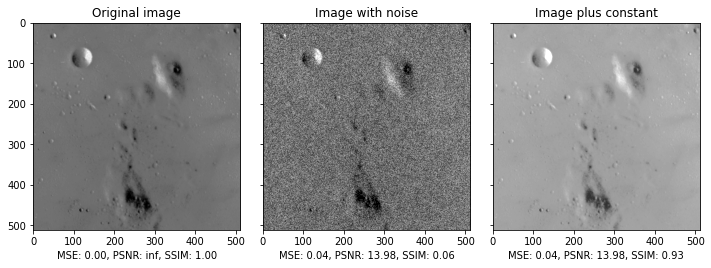

In [ ]:
img = img_as_float(data.moon())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = compare_mse(img, img)
psnr_none = compare_psnr(img,img)
ssim_none = compare_ssim(img, img, data_range=img.max() - img.min())

mse_noise = compare_mse(img, img_noise)
psnr_noise = compare_psnr(img,img_noise)
ssim_noise = compare_ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = compare_mse(img, img_const)
psnr_const = compare_psnr(img,img_const)
ssim_const = compare_ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, PSNR: {psnr_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, PSNR: {psnr_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, PSNR: {psnr_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()